# GUC NETW 1003 Kmeans Assginmnet 

Objective: exercise is to learn how to use build and use  kmeans clustering algortrithm    

At the end of this lab you will be able to
> 1. Build and run a K-means algorithm.
> 2. Know how to evalute K-means Algorithm 
> 2. Understand the effect of the parmeters ont he perfromance of the algorithm .
> 3. Understand the effect of distance.

## 1. Wirte K means function 

import required libraries 

In [55]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
import enum

> ### 1.1. Code for the distance function 

write a function to calculate the distance between a set of cluster centroids and all the data points 

Cluster_Distances = GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type) 
* The function shoud be able to handel data points with any number of features and any number of points 
* The function should be able to handle any K number of cluster centroids 
* To inrease speed do that in matrix format using numpy
* This should produce a matrix with rows equal to data points columns equal K 
* You should be able to calculate different types of Distance. In this assginmnet you are required to implement the following two 
    - Ecluidian distance
    - Pearson correlation distance
  

In [56]:
def GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type):
    
    if Distance_Type == 'Pearson correlation distance':
        Distance = scipy.spatial.distance.correlation(Data_points, Cluster_Centroids, w=None, centered=True)  
        
    if Distance_Type == 'ecluidian distance':
        Distance=np.sum((centroid - Data_points)**2)   
            
    return Distance

> ### 1.2. Code for K means function 

> Loop until a stopping condition 

> > in the loop do the following 
> > 1. Cluster Assginmnet 
> > > * Use the GUC_Distance to calculate between each cluster head and all the points 
> > > * Find the value and index of the minimum distance  for each row. 
> > > * for each point in the row use the index of the minmum distance to represent the cluster Centroid that this point will belong to.
> > > * Calculate and record the mean square distance for each cluster  
> > > * Use the mean square distances to calculate a stopping condition (e.g the sum of mean distances)
> > 2. Updtate Centroids  
> > > * Update the value for the cluster heads by calculating the mean value for the points in each cluster 
> > >  * Calculate the Cluster Metric (Distortion Function)
> > > > a number indicating the how good the clusters are . An example cluster metric is the  (sum of squared error between each point and its cluster center) 

In [72]:
def GUC_Kmean ( Data_points, Number_of_Clusters,  Distance_Type ):
  distortion=100000 #distortion value to be compared with
  for i in range(3000):
    dp=Data_points.shape[0]
    centeroid=Data_points[np.random.choice(dp,Number_of_Clusters,replace=False)]
    initClust = centeroid.copy()
    nearest=np.zeros(dp).astype(int)
    while True: #Assigning points to updated clusters
      previous=nearest.copy()
      distances=GUC_Distance ( centeroid, Data_points,Distance_Type)
      nearest=np.argmin(distances, axis=1)
      closestDistances = np.amin(distances,axis=1)
      for i in range(Number_of_Clusters):
          centeroid[i,:]=Data_points[nearest==i].mean(axis=0)
      if all(nearest==previous):
          break
    
    df=pd.DataFrame(Data_points)
    df["cluster"]=nearest
    df.head()
    Distances = sum(closestDistances)
    Dist = Distances/len(Data_points)
    if (Dist<distortion):
      distortion=Dist
      MinC=centeroid
      MinFI=nearest
      MinDF=df
        

    return MinFI ,MinC ,MinDF, distortion


## 2. Display Results 

* below is a an example fuction that displayes Clusters in 2D 

* You need to change the function so that is can display an n dimension data in the form of pairs of subplot 2D figures 

* The function is a helper function that is originaly be found in 
https://www.coursera.org/learn/ibm-unsupervised-learning/


In [73]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

> #### 2.1. helper Display function 

In [74]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

> #### 2.2. Example 1 : Circular Data Gen and display 

* below is an example of how to use the funciton 
  *  prepare the figure size and background 
   > * this part can be replaced by a number of subplots 
  
  * Produce a data set that represent the x and y o coordinates of a circle 
   > * this part can be replaced by data that you import froma file 
  
  * Data is displayed 
   > * to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 

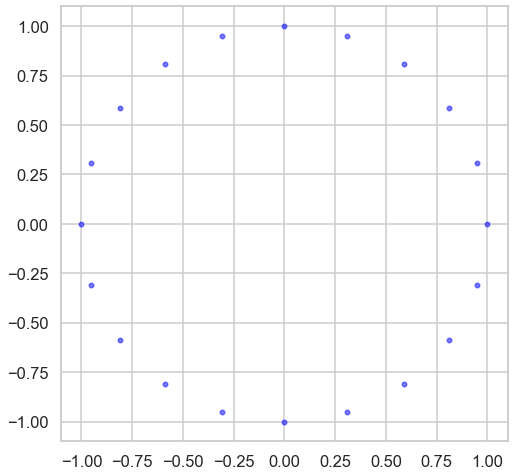

In [75]:
# prepare the figure sise and background 
# this part can be replaced by a number of subplots 
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle 
# this part can be replaced by data that you import froma file 
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
# Data is displayed 
# to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 
display_cluster(X)

> #### 2.3. Example 2 : Multi blob Data Gen and display 

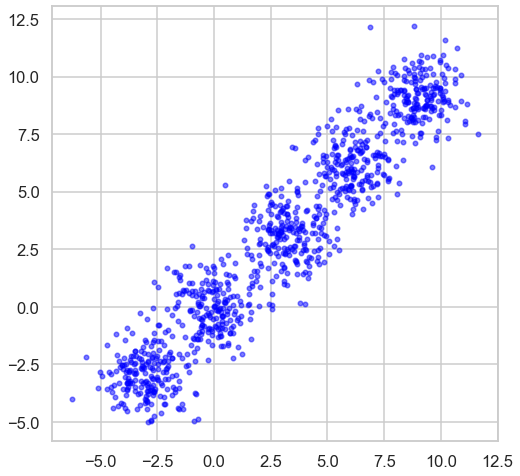

In [76]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
display_cluster(X)

#### 2.3. Example 3 : moons Data Gen and display 

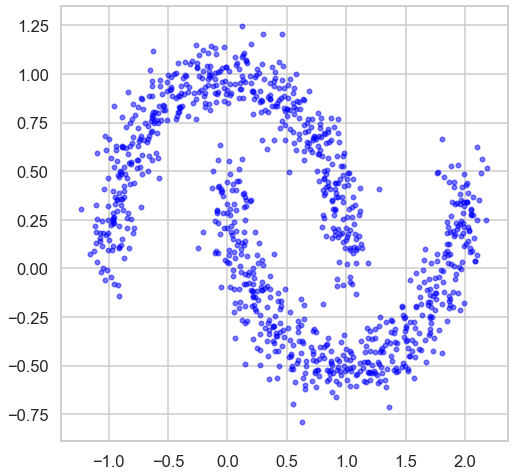

In [77]:
n_samples = 1000
X, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
display_cluster(X)

## 3. Testing the GUC_Kmean function on Simple 2D
1. Apply the GUC_Kmean fucntion to 2D Data provided by example 1, Example 2 and Example 3
2. Try a varing number of cluster centriods that range from 2 to 10 clusters on each set 
3. Display your results.
4. plot the Cluster perfromance Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

In [79]:
K=[2,3,4,5,6]
Distance=[]
n_samples = 3000
DataPoints, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
for i in K:
 Labels,Centroids,DataFrame,MinDistortion=GUC_Kmean (DataPoints,i, "Ecluidian_distance")
 plt.figure() 
 display_cluster(DataPoints,Labels,Centroids,i)
 Distance.append(MinDistortion)
plt.figure() 
plt.plot(K,Distance)

UnboundLocalError: local variable 'Distance' referenced before assignment

## 4. Using the GUC_Kmean function to segment customers int he provided customer dataset
1. Apply the GUC_Kmean fucntion to customer data  
2. Try a varing number of cluster that range from 2 to 10 cluster on each set 
3. Display your results.
4. plot the Cluster Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

In [71]:
data=pd.read_csv("/content/Customerdata.csv")
print(data.head())
from sklearn.decomposition import PCA
pca = PCA(2)
df = pca.fit_transform(data)
print(df)
k=[2,3,4,6]
dist=[]

for z in k:
 labels,centeroid,df1,mindisto=GUC_Kmean(df,z, "Ecluidian_distance")
 plt.figure() 
 display_cluster(df,labels,centeroid,z)
 dist.append(mindisto)
plt.figure() 
plt.plot(k,dist)


FileNotFoundError: [Errno 2] No such file or directory: '/content/Customerdata.csv'